<a href="https://colab.research.google.com/github/kartikeyaGUPTA45/KAPUR-S-ENTROPY/blob/master/KAPUR_ENTROPY_GENERAL_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAPUR ENTROPY GENERAL CODE

# IMPORTING LIBRARIES

In [0]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# READ AN IMAGE AND CONVERT IT INTO GRAYSCALE

In [2]:
image = Image.open('lena.tiff').convert("L")
print(image)

<PIL.Image.Image image mode=L size=512x512 at 0x7FCC89D7FB38>


# DEFINING THRESHOLDS

In [0]:
thresholds=[73,109,136,160,188]
thresholds.append(256)
thresholds.insert(0,0)

# CONVERT AN IMAGE INTO ARRAY

In [4]:
img = np.asarray(image)#Convert given input into array
print(img)

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


# MAKING HISTOGRAM 

In [0]:
def Hist(img):
    row, col = img.shape 
    y = np.zeros(256,dtype=float)
    for i in range(0,row):
        for j in range(0,col):
             y[img[i,j]] += 1
    x = np.arange(0,256)
    plt.bar(x, y, color='b', width=5, align='edge', alpha=0.25)
    plt.show()
    return y

# DISPLAY HISTOGRAM

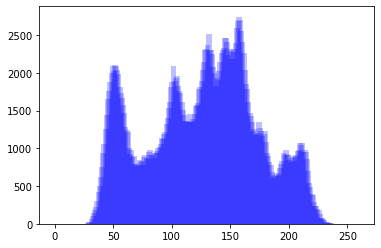

In [6]:
h=Hist(img)

# COUNT THE NUMBER OF PIXELS

In [7]:

cnt = 0
for i in range(0, len(h)):
    if h[i]>0:
           cnt += h[i]
            
print(cnt)

262144.0


# FINDING THE PROBABILITY OF AN INDIVIDUAL PIXEL

In [8]:
prob=[]
for i in range (len(h)):
    h[i]=h[i]/cnt
    prob.append(h[i])
print(h)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.81469727e-06 2.67028809e-05 7.24792480e-05
 1.10626221e-04 2.25067139e-04 3.70025635e-04 5.22613525e-04
 6.94274902e-04 8.43048096e-04 1.14059448e-03 1.60980225e-03
 1.90353394e-03 2.34222412e-03 2.89154053e-03 3.60107422e-03
 4.04357910e-03 4.78744507e-03 5.49697876e-03 6.28662109e-03
 6.71386719e-03 7.18688965e-03 7.62176514e-03 7.97271729e-03
 7.71713257e-03 8.01467896e-03 7.96508789e-03 7.74383545e-03
 7.54547119e-03 6.89697266e-03 6.59942627e-03 6.36291504e-03
 6.01577759e-03 5.60379028e-03 4.87518311e-03 4.71496582e-03
 4.65393066e-03 3.82614136e-03 3.54766846e-03 3.71932983e-03
 3.35693359e-03 3.406524

# KAPUR ENTROPY CALCULATION

In [9]:
SUM=[]
for i in range(len(thresholds)-1):
    SUM.append(sum(h[thresholds[i]:thresholds[i+1]]))
    
print(SUM)

[0.19054794311523438, 0.178497314453125, 0.18722915649414062, 0.21425247192382812, 0.12511062622070312, 0.10436248779296875]


In [0]:
w1=[]
for i in range(len(thresholds)-1):
    for j in range(thresholds[i],thresholds[i+1]):
        if prob[j]==0:
            w1.append(prob[j])
        else:
            w1.append((math.log(prob[j]/SUM[i]))*(prob[j]/SUM[i]))
    

In [11]:
print(w1)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00021658821252620213, -0.0012434228260472674, -0.0029951916412057364, -0.00432611073338643, -0.007962490465445048, -0.012125411344379795, -0.01617861328692805, -0.020457888395851012, -0.02398271020851762, -0.03063778332608326, -0.04033033234011433, -0.04601488783736576, -0.054070288196632614, -0.06355409759637433, -0.07500202250278824, -0.08175892442188587, -0.09255677013822945, -0.10228746580807768, -0.1125526855111517, -0.11788517827312485, -0.12362282711184691, -0.12875325614474725, -0.13279826188022867, -0.12986067417452923, -0.13327640578788866, -0.13271120227859778, -0.13016963956030494, -0.12786281646032369, -0.12012630064269211, -0.11647121241576304, -0.11351580397971385, -0.10909395663958253, -0.10370904810963286, -0.09378838469558966, -0.09153299107177144, -0.0906663296575885, -0.07847232601914254, -0.07416789038270682, -0.07683432412916684, -0.0711

In [12]:
kapur_entropy=[]
for i in range(len(thresholds)-1):
    kapur_entropy.append(-(sum(w1[thresholds[i]:thresholds[i+1]])))
    
print(kapur_entropy)

[3.622596410525714, 3.537050665446613, 3.272837894434081, 3.173782873709266, 3.2825297705375984, 3.5675536433562254]


# RESULT

In [13]:
J=sum(kapur_entropy)
print(J)

20.456351258009498
